In [2]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing, splitting data, and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For handling imbalanced data
from imblearn.over_sampling import SMOTE

# For the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # A simple Neural Network

# Set some display options for better output
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows to see what it looks like
print("First 5 rows of the dataset:")
display(df.head())

# Get a summary of the data (data types, non-null values)
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [4]:
# Convert TotalCharges to a numeric type. Errors='coerce' will turn non-numeric values into NaN (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill the few missing values with the median of the column
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop the customerID column as it's just an identifier and has no predictive value
df.drop('customerID', axis=1, inplace=True)

/tmp/ipython-input-638984875.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


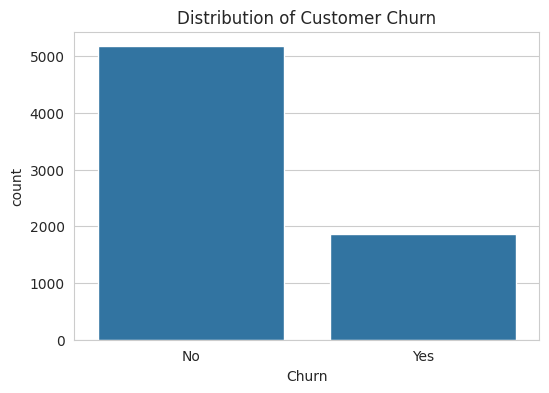

In [5]:
# See the distribution of the target variable 'Churn'
print("Churn Distribution:")
print(df['Churn'].value_counts())

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

In [6]:
# Identify categorical columns (excluding the target 'Churn')
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

# Apply one-hot encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode the target variable 'Churn' separately
le = LabelEncoder()
df_processed['Churn'] = le.fit_transform(df_processed['Churn']) # No=0, Yes=1

print("Data after encoding (first 5 rows):")
display(df_processed.head())

Data after encoding (first 5 rows):


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [7]:
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.value_counts())
print("Resampled training set shape:", y_train_smote.value_counts())

Original training set shape: Churn
0    4139
1    1495
Name: count, dtype: int64
Resampled training set shape: Churn
0    4139
1    4139
Name: count, dtype: int64


In [10]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test) # Use the same scaler fitted on the training data

In [11]:
# Initialize and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
print("Logistic Regression model trained.")

Logistic Regression model trained.


In [12]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
print("Decision Tree model trained.")

Decision Tree model trained.


In [13]:
# Initialize and train the model
nn_model = MLPClassifier(random_state=42, max_iter=500) # Increased max_iter for convergence
nn_model.fit(X_train_smote, y_train_smote)
print("Neural Network model trained.")

Neural Network model trained.


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1035
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.77      1409



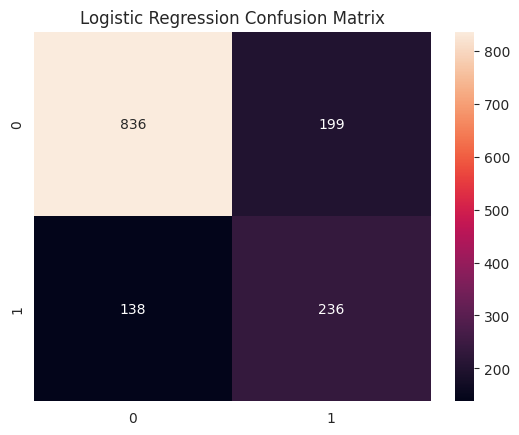


Decision Tree Results
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1035
           1       0.46      0.53      0.49       374

    accuracy                           0.71      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.73      0.71      0.72      1409



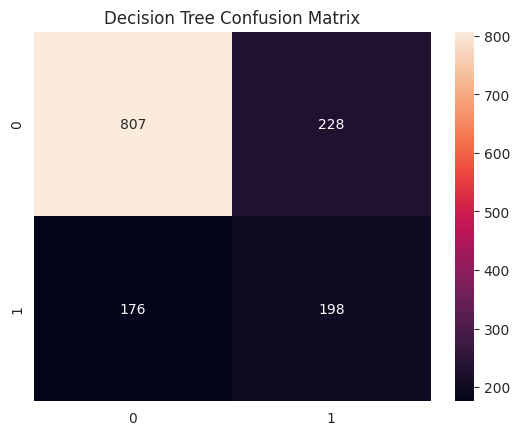


Neural Network Results
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.54      0.53      0.54       374

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409



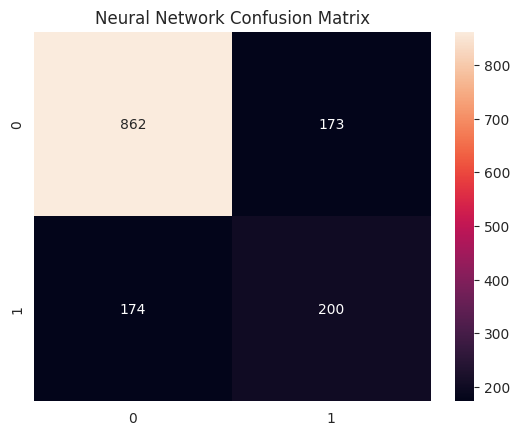

In [14]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

# --- Logistic Regression Evaluation ---
print("="*30)
print("Logistic Regression Results")
print("="*30)
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


# --- Decision Tree Evaluation ---
print("\n" + "="*30)
print("Decision Tree Results")
print("="*30)
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.show()


# --- Neural Network Evaluation ---
print("\n" + "="*30)
print("Neural Network Results")
print("="*30)
print(classification_report(y_test, y_pred_nn))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='g')
plt.title('Neural Network Confusion Matrix')
plt.show()